# **Sleep Quality Analysis**

<font size="4px"><p>Adequate sleep plays a vital role in maintaining overall health and greatly influences personal well-being. By evaluating the quality of sleep and its connection to few health factors, we can offer valuable insights to improve sleep quality and boost overall health. </p>
<dl>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv('Sleep Quality.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Calories Burned,Physical Activity Level,Medication Usage
0,1,25,f,8,23:00,6:30,2500,medium,no
1,2,34,m,7,0:30,7:00,2200,low,yes
2,3,29,f,9,22:45,6:45,2700,high,no
3,4,41,m,5,1:00,6:30,2100,low,no
4,5,22,f,8,23:30,7:00,2800,high,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Calories Burned          100 non-null    int64 
 7   Physical Activity Level  100 non-null    object
 8   Medication Usage         100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [11]:
df.describe()

,User ID,Age,Sleep Quality,Calories Burned
count,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,2421.00000
std,29.011492,8.454865,1.734964,281.06759
min,1.000000,22.000000,4.000000,2000.00000
25%,25.750000,28.750000,5.750000,2175.00000
50%,50.500000,35.000000,7.500000,2400.00000
75%,75.250000,44.000000,8.250000,2700.00000
max,100.000000,50.000000,9.000000,2900.00000


In [13]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Calories Burned            0
Physical Activity Level    0
Medication Usage           0
dtype: int64

In [15]:
df.drop(['User ID'], axis = 1, inplace = True)
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Calories Burned,Physical Activity Level,Medication Usage
0,25,f,8,23:00,6:30,2500,medium,no
1,34,m,7,0:30,7:00,2200,low,yes
2,29,f,9,22:45,6:45,2700,high,no
3,41,m,5,1:00,6:30,2100,low,no
4,22,f,8,23:30,7:00,2800,high,no


# **Age vs Sleep Quality**
<font size="4px"><p>This section the correlation between age and sleep quality is examined </p>
<dl>

In [18]:
age_vs_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()
age_vs_sleep_quality_corr['Age']

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

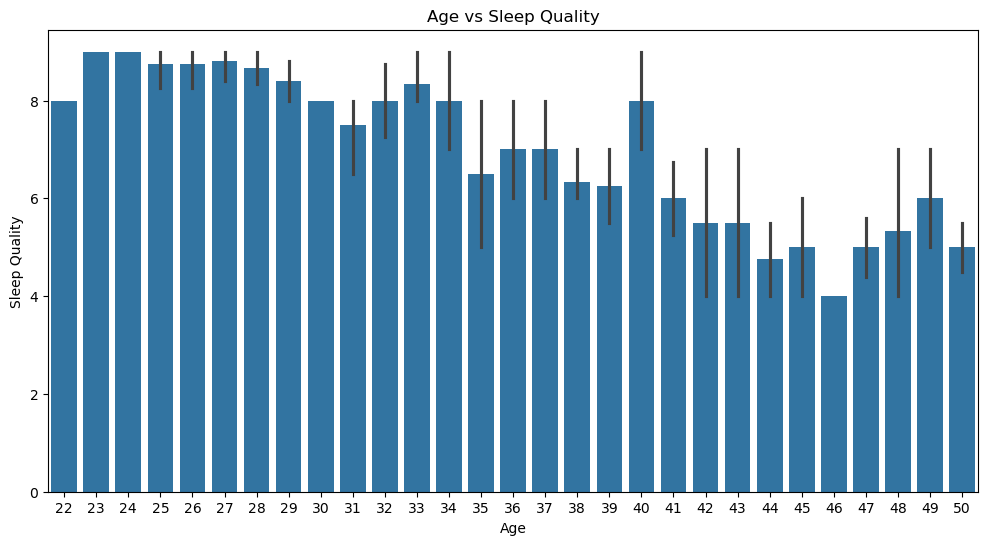

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data = df)
plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

In [22]:
#Linear Regression
from sklearn.linear_model import LinearRegression
X = df[['Age']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

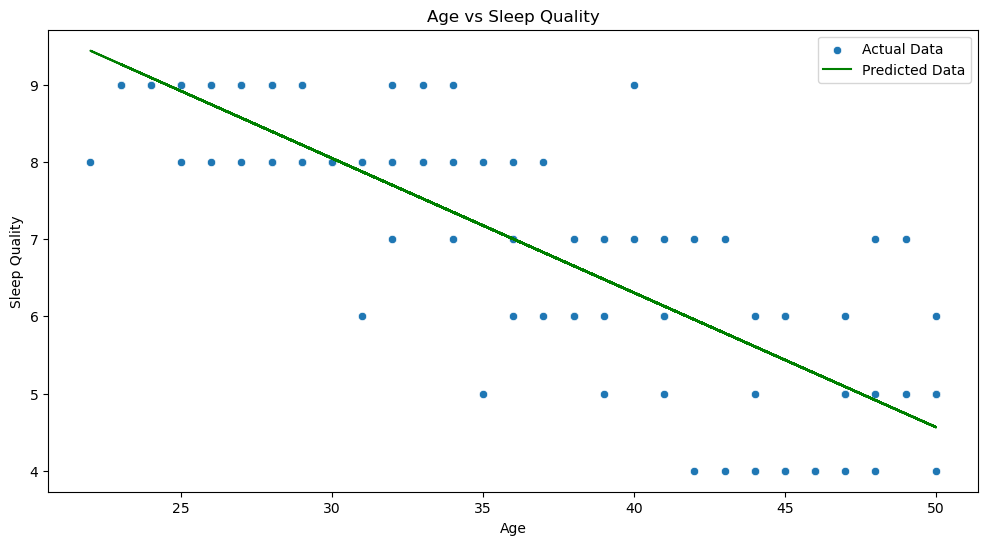

In [24]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Actual Data')

plt.plot(X, model.predict(X), color = 'green', label = 'Predicted Data')

plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.legend()
plt.show()

In [26]:
model.coef_

array([-0.17408531])

In [28]:
model.intercept_

13.268812023190648

<font size="4px"><p>The trend shows that with the increasing age, the sleep quality is decreasing</p>

# **Physical Activity vs Sleep Quality**
<font size="4px"><p>This section the correlation between physical activity based on gender and sleep quality is analyzed</p>
<dl>

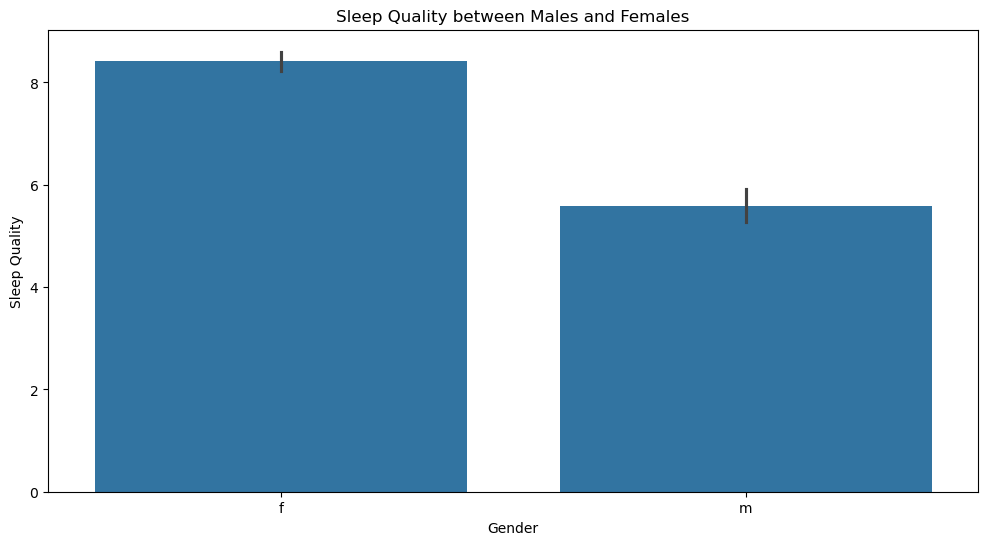

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Sleep Quality', data=df)
plt.title('Sleep Quality between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

In [39]:
custom_codes = {'low': 1, 'medium': 2, 'high': 3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)

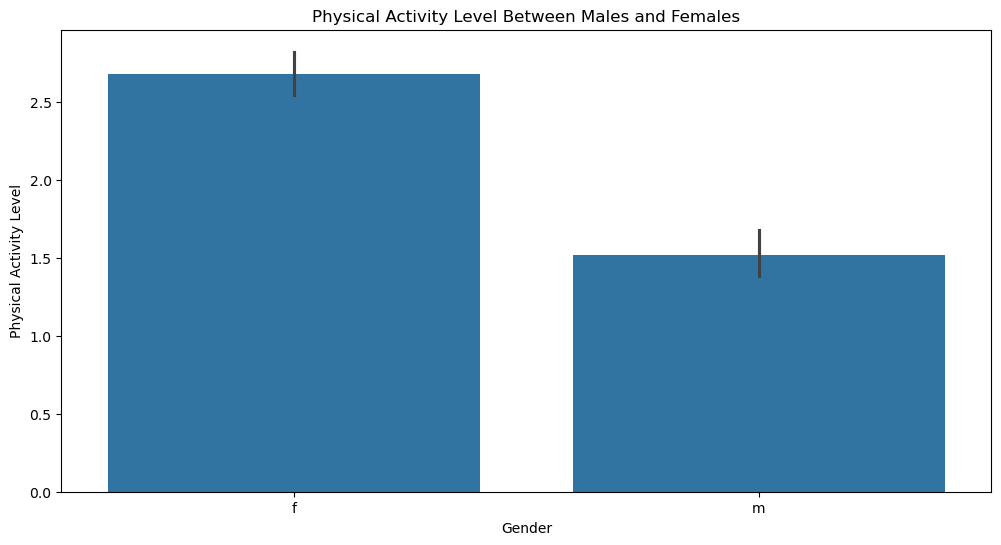

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Physical Activity Level', data=df)
plt.title('Physical Activity Level Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.show()

In [43]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females,  nan_policy='omit')


physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females, nan_policy='omit')

In [45]:
print(f"t-sleep-quality  + {t_sleep_quality:.2f}")
print(f"p-sleep-quality  + {p_sleep_quality:.2f}")
print(f"t-physical_activity  + {t_physical_activity:.2f}")
print(f"p-physical_activity  + {p_physical_activity:.2f}")

t-sleep-quality  + -14.32
p-sleep-quality  + 0.00
t-physical_activity  + -10.98
p-physical_activity  + 0.00


<font size="4px"><p>The graphs show us that female is higher in physical activity compared to male, thus, better sleep quality</p>
<dl>

# **Sleep Duration vs Sleep Quality**
<font size="4px"><p>In this section, the sleep duration will be compared to the sleep quality</p>
<dl>

In [49]:
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60
    
df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Calories Burned,Physical Activity Level,Medication Usage
0,25,f,8,23.00,6.50,2500,2,no
1,34,m,7,0.50,7.00,2200,1,yes
2,29,f,9,22.75,6.75,2700,3,no
3,41,m,5,1.00,6.50,2100,1,no
4,22,f,8,23.50,7.00,2800,3,no


In [51]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Calories Burned,Physical Activity Level,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,2500,2,no,7.5
1,34,m,7,0.50,7.00,2200,1,yes,6.5
2,29,f,9,22.75,6.75,2700,3,no,8.0
3,41,m,5,1.00,6.50,2100,1,no,5.5
4,22,f,8,23.50,7.00,2800,3,no,7.5


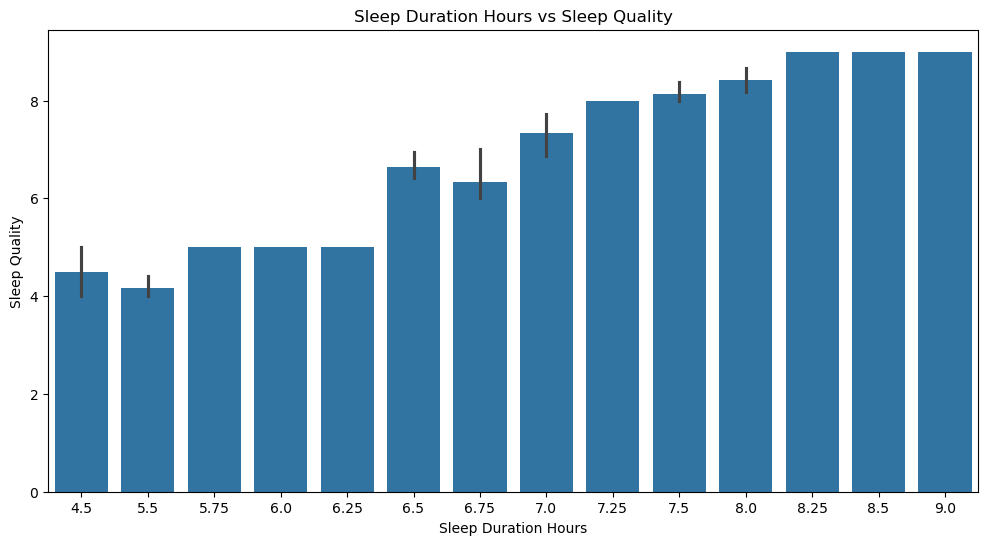

In [53]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration Hours vs Sleep Quality")
plt.show()

In [55]:
#Linear Regression
X = df[['Sleep Duration Hours']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

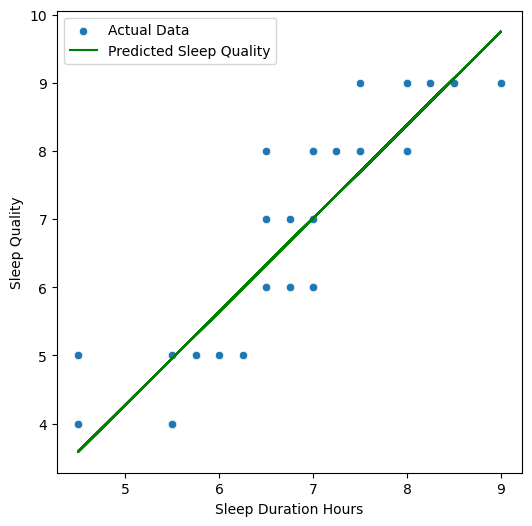

In [57]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'green', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import r2_score
r2_score(Y, model.predict(X))

0.8443929044393098

<font size="4px"><p>With increasing duration of sleep, the quality of sleep is also increasing</p>
<dl>

# **Calorie Burned vs Sleep Quality**

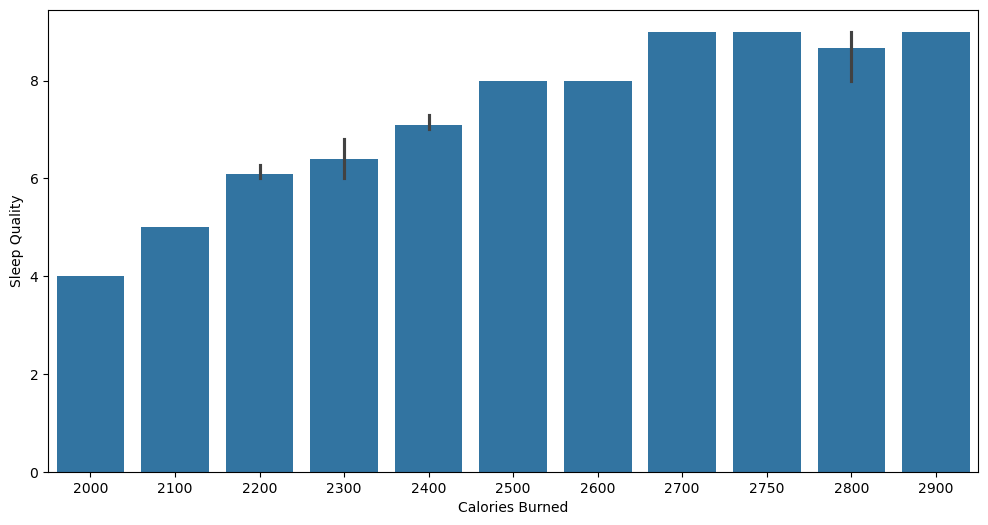

In [63]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

In [65]:
#Linear Regression
model = LinearRegression()

X = df[['Calories Burned']]
Y = df['Sleep Quality']

model.fit(X, Y)

LinearRegression()

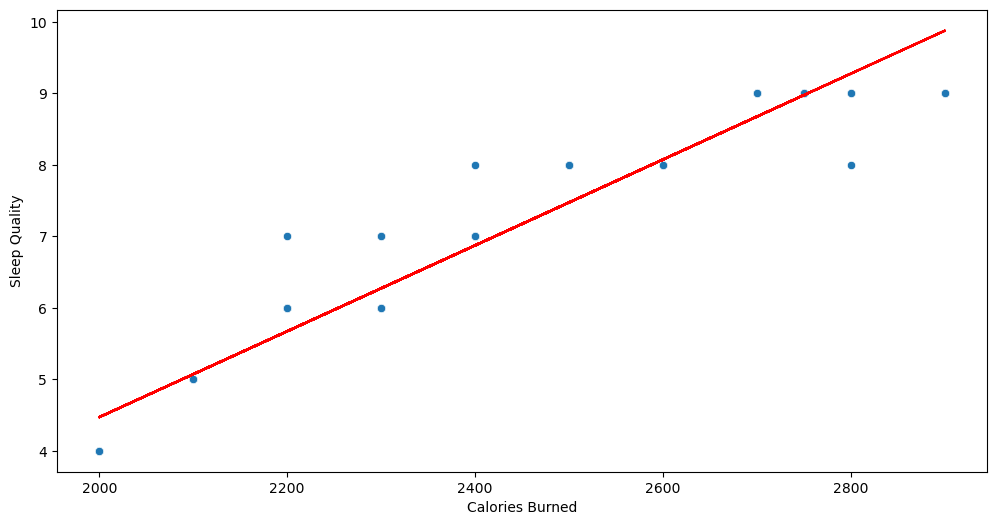

In [67]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.plot(X, model.predict(X), color = 'red')
plt.show()

In [69]:
r2_score(Y, model.predict(X))

0.9478131260919267

# **Medication Intake vs Sleep Quality**

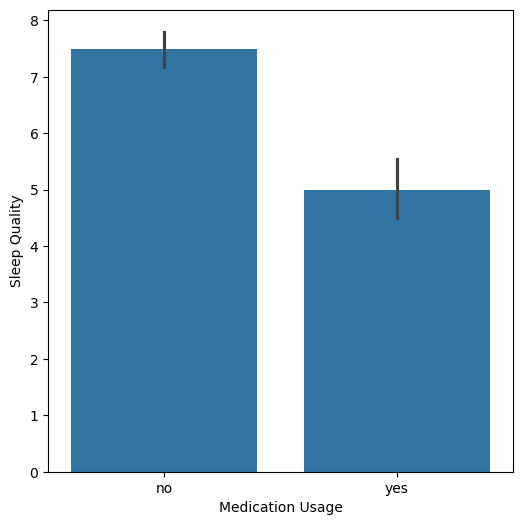

In [72]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [74]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)
print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


# **Summary Heatmap**

In [77]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


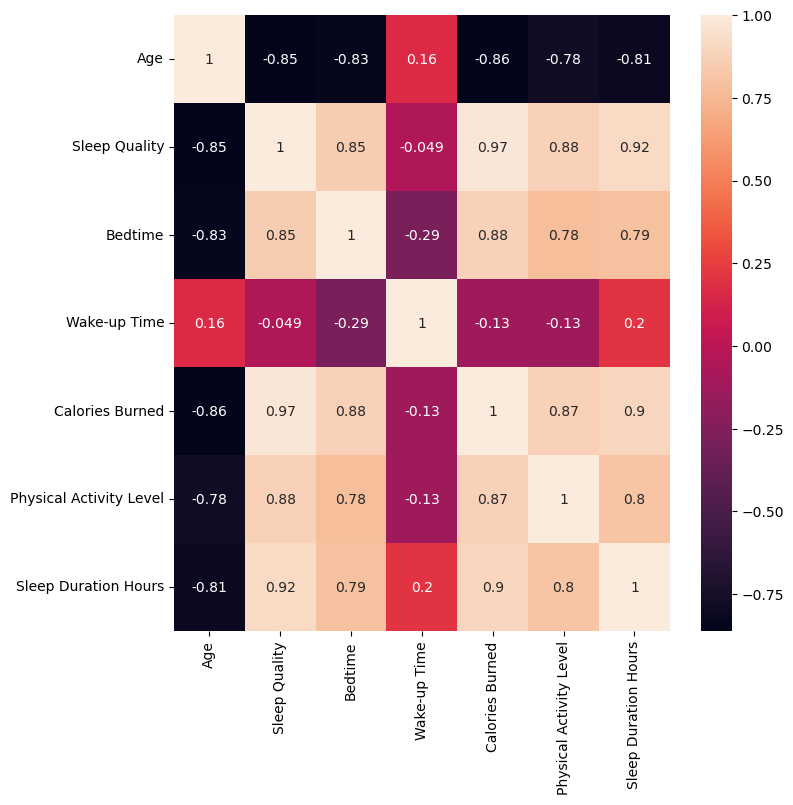

In [79]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()